## Welcome

This is material for the **Directed Acyclical Graphs** chapter in Scott Cunningham's book, [Causal Inference: The Mixtape.](https://mixtape.scunning.com/)


In [2]:
!pip install Stargazer

In [4]:
!pip install plotnine

  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3


In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

import plotnine as p

In [7]:
# read data
def read_data(file):
    return pd.read_csv("https://raw.github.com/scunning1975/mixtape/master/" + file)


## Collider - Discrimination

In [8]:
tb = pd.DataFrame({
    'female': np.random.binomial(1, .5, size=10000),
    'ability': np.random.normal(size=10000)})
tb['discrimination'] = tb.female.copy()
tb['occupation'] = 1 + 2*tb['ability'] + 0*tb['female'] - 2*tb['discrimination'] + np.random.normal(size=10000)
tb['wage'] = 1 - 1*tb['discrimination'] + 1*tb['occupation'] + 2*tb['ability'] + np.random.normal(size=10000) 

In [9]:

lm_1 = sm.OLS.from_formula('wage ~ female', data=tb).fit()
lm_2 = sm.OLS.from_formula('wage ~ female + occupation', data=tb).fit()
lm_3 = sm.OLS.from_formula('wage ~ female + occupation + ability', data=tb).fit()


st = Stargazer((lm_1,lm_2,lm_3))
st.custom_columns(["Biased Unconditional", "Biased", "Unbiased Conditional"], [1, 1, 1])
st

#### QUESTIONS
- What is the true direct effect of discrimination on wages?  
- Explain the channels by which discrimination impacts wages.  
- What makes occupation a collider?
- What controls are necessary to eliminate this collider bias?



## Movie Star

In [10]:
start_is_born = pd.DataFrame({
    'beauty': np.random.normal(size=2500),
    'talent': np.random.normal(size=2500)})
    
start_is_born['score'] = start_is_born['beauty'] + start_is_born['talent']
start_is_born['c85'] = np.percentile(start_is_born['score'], q=85)
start_is_born['star'] = 0
start_is_born.loc[start_is_born['score']>start_is_born['c85'], 'star'] = 1
start_is_born.head()

beauty    talent     score       c85  star
0  0.680957  0.395816  1.076773  1.485903     0
1 -1.215411 -0.162014 -1.377425  1.485903     0
2 -0.155415  0.723556  0.568140  1.485903     0
3  0.039753  1.289617  1.329369  1.485903     0
4 -2.002429  0.008856 -1.993573  1.485903     0

In [11]:
start_is_born

beauty    talent     score       c85  star
0     0.680957  0.395816  1.076773  1.485903     0
1    -1.215411 -0.162014 -1.377425  1.485903     0
2    -0.155415  0.723556  0.568140  1.485903     0
3     0.039753  1.289617  1.329369  1.485903     0
4    -2.002429  0.008856 -1.993573  1.485903     0
...        ...       ...       ...       ...   ...
2495  0.142391 -0.566667 -0.424276  1.485903     0
2496  0.357987  0.852802  1.210788  1.485903     0
2497 -0.886896 -1.049798 -1.936694  1.485903     0
2498 -1.106324  1.102488 -0.003836  1.485903     0
2499  0.056262 -0.152589 -0.096326  1.485903     0

[2500 rows x 5 columns]

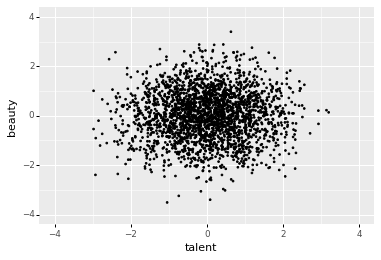

<ggplot: (77997021922)>

In [10]:
lm = sm.OLS.from_formula('beauty ~ talent', data=start_is_born).fit()

p.ggplot(start_is_born, p.aes(x='talent', y='beauty')) +\
    p.geom_point(size = 0.5) +\
    p.xlim(-4, 4) +\
    p.ylim(-4, 4)

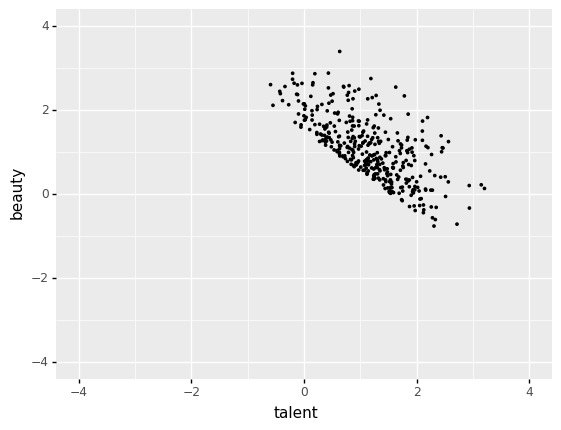

<ggplot: (77997760729)>

In [11]:
p.ggplot(start_is_born[start_is_born.star==1], p.aes(x='talent', y='beauty')) +\
    p.geom_point(size = 0.5) +\
    p.xlim(-4, 4) +\
    p.ylim(-4, 4)

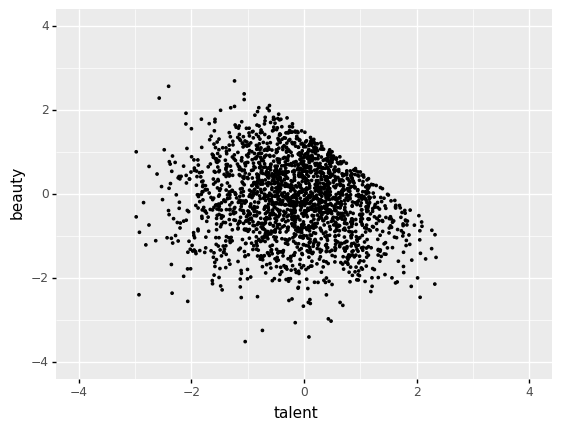

<ggplot: (77997802632)>

In [12]:
p.ggplot(start_is_born[start_is_born.star==0], p.aes(x='talent', y='beauty')) +\
    p.geom_point(size = 0.5) +\
    p.xlim(-4, 4) +\
    p.ylim(-4, 4)

#### QUESTIONS
- What is the correlation between talent and beauty among stars?  Non-stars?
- But what is the correlation between talent and beauty in the population?